# Compare Simulated Read pairs

## Simulation Paramters:

### Nucleotide substitution frequences
**f1**: equal frequencies, i.e. freq(A) = freq(C) = freq(G) = freq(T) = 0.25,
**f2**: GC-rich, i.e. freq(A) = 0.1, freq(C) = 0.3, freq(G) = 0.4, freq(T) = 0.2,
**f3**: AT-rich, i.e. freq(A) = freq(T) = 0.4, freq(C) = freq(G) = 0.1.

### Evolutionary model
model parameters
  - **nogam**: GTR (six relative rates of nucleotide substitution)
  - **gamma**: GTR+Γ (six rates and one Γ shape parameter)

### distances
0.05 --> 1.0 (stepping by 0.05)
sim_distances = range_with_floats_list(0.05, 1.00, 0.05)

## Zenodo Ref

https://zenodo.org/record/4034462


The simulated sequences provided on Zenodo are **nucleotide** sequences containing "--" stretches to represent indels. Indels were removed (and adjacent sections concatenated) prior to assessment with sourmash.

I employed two methods to get protein k-mers: 6-frame translation within sourmash, and prodigal translation --> ORF's.

All files with the ".dnainput.csv.gz" extension started from DNA and used 6-frame translation within sourmash to obtain protein k-mers. 
All files with the ".prodigal.csv.gz" extension were produced by reading in Prodigal-translated ORF's produced from the original simulated DNA.

In [1]:
import os
#import re
import glob
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_context("paper")

In [2]:
pd.__version__

'1.0.3'

In [ ]:
dna_csvs = glob.glob("../simread_comparisons/*dnainput.compare.csv.gz")
#test_csvs = ["data-d0.05-f1-gamma.compare.csv.gz"]
protein_csvs = glob.glob("../simread_comparisons/*prodigal.compare.csv.gz")

In [4]:
compareDF = pd.concat([pd.read_csv(csv, sep=",", compression="gzip").assign(fileinfo=os.path.basename(csv).rsplit(".compare.csv.gz")[0]) for csv in dna_csvs])
proteinDF = pd.concat([pd.read_csv(csv, sep=",", compression="gzip").assign(fileinfo=os.path.basename(csv).rsplit(".compare.csv.gz")[0]) for csv in protein_csvs])

In [61]:
compareDF

seed  freq(T)  freq(C)  freq(A)  freq(G)  rate(C-T)  rate(A-T)  \
0     401     0.40     0.10     0.40     0.10    2.00743   0.615599   
1     402     0.40     0.10     0.40     0.10    1.35762   0.127302   
2     403     0.40     0.10     0.40     0.10    1.38297   0.228854   
3     404     0.40     0.10     0.40     0.10    1.50213   0.232770   
4     405     0.40     0.10     0.40     0.10    1.32803   0.247296   
..    ...      ...      ...      ...      ...        ...        ...   
195   196     0.25     0.25     0.25     0.25    2.12115   0.433461   
196   197     0.25     0.25     0.25     0.25    1.37466   0.326142   
197   198     0.25     0.25     0.25     0.25    1.55224   0.333574   
198   199     0.25     0.25     0.25     0.25    1.90767   0.617605   
199   200     0.25     0.25     0.25     0.25    1.60329   0.284198   

     rate(G-T)  rate(A-C)  rate(C-G)  ...  hp-k39-scaled100.jaccard-pdist  \
0     0.246909   0.598580   0.306629  ...                        0.055956   
1     0.193659   0.212067   0.147882  ...                        0.045062   
2     0.235608   0.332592   0.532473  ...                        0.050981   
3     0.234467   0.372922   0.436632  ...                        0.050432   
4     0.214534   0.438519   1.144030  ...                        0.052387   
..         ...        ...        ...  ...                             ...   
195   0.390442   0.429627   0.418261  ...                        0.122512   
196   0.317280   0.522544   0.966229  ...                        0.123466   
197   0.331005   0.495819   0.897968  ...                        0.122711   
198   0.187626   0.495055   0.506380  ...                        0.125856   
199   0.196971   0.453280   0.226200  ...                        0.124130   

     hp-k39-scaled100.containment  hp-k39-scaled100.containment-pdist  \
0                        0.107177                            0.041227   
1                        0.168134                            0.031425   
2                        0.131757                            0.036680   
3                        0.133833                            0.036339   
4                        0.123328                            0.038127   
..                            ...                                 ...   
195                      0.006253                            0.106410   
196                      0.006010                            0.107312   
197                      0.006084                            0.107033   
198                      0.005270                            0.110296   
199                      0.005770                            0.108238   

     hp-k39-scaled100.num_hashes  hp-k42-scaled100.jaccard  \
0          (99329, 96905, 10386)                  0.047071   
1         (100119, 97131, 16331)                  0.077888   
2         (99524, 102314, 13113)                  0.059377   
3         (98914, 100305, 13238)                  0.061405   
4         (99864, 100996, 12316)                  0.056145   
..                           ...                       ...   
195         (95959, 100272, 600)                  0.002455   
196         (97506, 102455, 586)                  0.001941   
197          (98363, 97634, 594)                  0.002108   
198          (98858, 98902, 521)                  0.001741   
199          (97226, 99946, 561)                  0.001976   

     hp-k42-scaled100.jaccard-pdist hp-k42-scaled100.containment  \
0                          0.055742                     0.090918   
1                          0.045011                     0.146907   
2                          0.050770                     0.113455   
3                          0.050054                     0.116096   
4                          0.051965                     0.106624   
..                              ...                          ...   
195                        0.118948                     0.005004   
196                        0.123858                     0.003

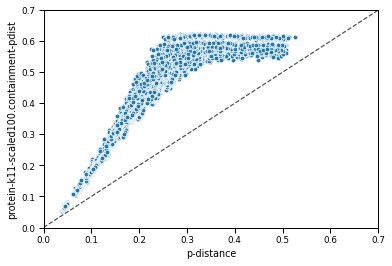

In [62]:
## Let's just plot something to see what we're working with

# 6-frame translation --> protein; uncorrected pdistance
g=sns.scatterplot(data=compareDF, x="p-distance", y="protein-k11-scaled100.containment-pdist",palette="GnBu_d")
g.set(ylim=(0, 0.7))
g.set(xlim=(0, 0.7))
g.plot(g.get_xlim(), g.get_ylim(), ls="--", c=".3") #add 1:1 line.


# DNA Input Comparisons

In [64]:
compareDF.columns
#non_dist_cols = ['seed', 'freq(T)', 'freq(C)', 'freq(A)', 'freq(G)', 'rate(C-T)','rate(A-T)', 'rate(G-T)', 'rate(A-C)', 'rate(C-G)', 'alpha', 'lgt1','lgt2', 'sites', 'core', 'name', 'fileinfo']
pdist_columns = [x for x in compareDF.columns if "pdist" in x]
pdist_columns

['nucleotide-k21-scaled1000.jaccard-pdist',
 'nucleotide-k21-scaled1000.containment-pdist',
 'nucleotide-k31-scaled1000.jaccard-pdist',
 'nucleotide-k31-scaled1000.containment-pdist',
 'nucleotide-k51-scaled1000.jaccard-pdist',
 'nucleotide-k51-scaled1000.containment-pdist',
 'protein-k7-scaled100.jaccard-pdist',
 'protein-k7-scaled100.containment-pdist',
 'protein-k8-scaled100.jaccard-pdist',
 'protein-k8-scaled100.containment-pdist',
 'protein-k9-scaled100.jaccard-pdist',
 'protein-k9-scaled100.containment-pdist',
 'protein-k10-scaled100.jaccard-pdist',
 'protein-k10-scaled100.containment-pdist',
 'protein-k11-scaled100.jaccard-pdist',
 'protein-k11-scaled100.containment-pdist',
 'protein-k12-scaled100.jaccard-pdist',
 'protein-k12-scaled100.containment-pdist',
 'dayhoff-k15-scaled100.jaccard-pdist',
 'dayhoff-k15-scaled100.containment-pdist',
 'dayhoff-k16-scaled100.jaccard-pdist',
 'dayhoff-k16-scaled100.containment-pdist',
 'dayhoff-k17-scaled100.jaccard-pdist',
 'dayhoff-k17-scal

In [75]:
meltedCompare = pd.melt(compareDF, id_vars=["name", "p-distance"], value_vars=pdist_columns, var_name='comparison_type', value_name='estimated p-distance')

In [76]:
meltedCompare

name  p-distance  \
0       data-d0.05-f3-gamma-seed401    0.043100   
1       data-d0.05-f3-gamma-seed402    0.037653   
2       data-d0.05-f3-gamma-seed403    0.041617   
3       data-d0.05-f3-gamma-seed404    0.041302   
4       data-d0.05-f3-gamma-seed405    0.043352   
...                             ...         ...   
866395  data-d0.15-f1-gamma-seed196    0.102482   
866396  data-d0.15-f1-gamma-seed197    0.109415   
866397  data-d0.15-f1-gamma-seed198    0.108960   
866398  data-d0.15-f1-gamma-seed199    0.107828   
866399  data-d0.15-f1-gamma-seed200    0.103378   

                                comparison_type  estimated p-distance  
0       nucleotide-k21-scaled1000.jaccard-pdist              0.049144  
1       nucleotide-k21-scaled1000.jaccard-pdist              0.041895  
2       nucleotide-k21-scaled1000.jaccard-pdist              0.046106  
3       nucleotide-k21-scaled1000.jaccard-pdist              0.047352  
4       nucleotide-k21-scaled1000.jaccard-pdist              0.049552  
...                                         ...                   ...  
866395       hp-k42-scaled100.containment-pdist              0.103938  
866396       hp-k42-scaled100.containment-pdist              0.108930  
866397       hp-k42-scaled100.containment-pdist              0.107592  
866398       hp-k42-scaled100.containment-pdist              0.111599  
866399       hp-k42-scaled100.containment-pdist              0.108651  

[866400 rows x 4 columns]

In [77]:
meltedCompare["alphabet"] = meltedCompare["comparison_type"].str.extract(r"(?P<alphabet>\w*)-k")
meltedCompare["ksize"] = meltedCompare["comparison_type"].str.extract(r"-k(?P<ksize>\d*)")
meltedCompare["nt_freq"] = meltedCompare["name"].str.extract(r"-(?P<nt_freq>f\d*)-")
meltedCompare["model"] = meltedCompare["name"].str.extract(r"(?P<model>\w*)-seed")
meltedCompare["alpha-ksize"] = meltedCompare["alphabet"] + "-" + meltedCompare["ksize"]
meltedCompare["scaled"] = meltedCompare["comparison_type"].str.extract(r"-scaled(?P<scaled>\d*)")
meltedCompare["estimator"] = meltedCompare["comparison_type"].str.extract(r".(?P<alphabet>\w*)-pdist")
meltedCompare["full_model"] = meltedCompare["nt_freq"] + "-" + meltedCompare["model"]


In [78]:
meltedCompare = meltedCompare.loc[meltedCompare["estimated p-distance"] < 1.0 ]

In [79]:
meltedCompare["PC_pdist"] = -np.log(1 - meltedCompare["estimated p-distance"])
meltedCompare["true ANI"] = 1- meltedCompare["p-distance"] 
meltedCompare["estimated ANI"] = 1- meltedCompare["PC_pdist"] 

/Users/tessa/miniconda3/envs/forage-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/tessa/miniconda3/envs/forage-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/tessa/miniconda3/envs/forage-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [80]:
meltedCompare.set_index("name")

p-distance  \
name                                      
data-d0.05-f3-gamma-seed401    0.043100   
data-d0.05-f3-gamma-seed402    0.037653   
data-d0.05-f3-gamma-seed403    0.041617   
data-d0.05-f3-gamma-seed404    0.041302   
data-d0.05-f3-gamma-seed405    0.043352   
...                                 ...   
data-d0.15-f1-gamma-seed196    0.102482   
data-d0.15-f1-gamma-seed197    0.109415   
data-d0.15-f1-gamma-seed198    0.108960   
data-d0.15-f1-gamma-seed199    0.107828   
data-d0.15-f1-gamma-seed200    0.103378   

                                                     comparison_type  \
name                                                                   
data-d0.05-f3-gamma-seed401  nucleotide-k21-scaled1000.jaccard-pdist   
data-d0.05-f3-gamma-seed402  nucleotide-k21-scaled1000.jaccard-pdist   
data-d0.05-f3-gamma-seed403  nucleotide-k21-scaled1000.jaccard-pdist   
data-d0.05-f3-gamma-seed404  nucleotide-k21-scaled1000.jaccard-pdist   
data-d0.05-f3-gamma-seed405  nucleotide-k21-scaled1000.jaccard-pdist   
...                                                              ...   
data-d0.15-f1-gamma-seed196       hp-k42-scaled100.containment-pdist   
data-d0.15-f1-gamma-seed197       hp-k42-scaled100.containment-pdist   
data-d0.15-f1-gamma-seed198       hp-k42-scaled100.containment-pdist   
data-d0.15-f1-gamma-seed199       hp-k42-scaled100.containment-pdist   
data-d0.15-f1-gamma-seed200       hp-k42-scaled100.containment-pdist   

                             estimated p-distance    alphabet ksize nt_freq  \
name                                                                          
data-d0.05-f3-gamma-seed401              0.049144  nucleotide    21      f3   
data-d0.05-f3-gamma-seed402              0.041895  nucleotide    21      f3   
data-d0.05-f3-gamma-seed403              0.046106  nucleotide    21      f3   
data-d0.05-f3-gamma-seed404              0.047352  nucleotide    21      f3   
data-d0.05-f3-gamma-seed405              0.049552  nucleotide    21      f3   
...                                           ...         ...   ...     ...   
data-d0.15-f1-gamma-seed196              0.103938          hp    42      f1   
data-d0.15-f1-gamma-seed197              0.108930          hp    42      f1   
data-d0.15-f1-gamma-seed198              0.107592          hp    42      f1   
data-d0.15-f1-gamma-seed199              0.111599          hp    42      f1   
data-d0.15-f1-gamma-seed200              0.108651          hp    42      f1   

                             model    alpha-ksize scaled    estimator  \
name                                                                    
data-d0.05-f3-gamma-seed401  gamma  nucleotide-21   1000      jaccard   
data-d0.05-f3-gamma-seed402  gamma  nucleotide-21   1000      jaccard   
data-d0.05-f3-gamma-seed403  gamma  nucleotide-21   1000      jaccard   
data-d0.05-f3-gamma-seed404  gamma  nucleotide-21   1000      jaccard   
data-d0.05-f3-gamma-seed405  gamma  nucleotide-21   1000      jaccard   
...                            ...            ...    ...          ...   
data-d0.15-f1-gamma-seed196  gamma          hp-42    100  containment   
data-d0.15-f1-gamma-seed197  gamma          hp-42    100  containment   
data-d0.15-f1-gamma-seed198  gamma          hp-42    100  containment   
data-d0.15-f1-gamma-seed199  gamma          hp-42    100  containment   
data-d0.15-f1-gamma-seed200  gamma          hp-42    100  containment   

                            full_model  PC_pdist  true ANI  estimated ANI  
name                                                                       
data-d0.05-f3-gamma-seed401   f3-gamma  0.050392  0.956900       0.949608  
data-d0.05-f3-gamma-seed402   f3-gamma  0.042798  0.962347       0.957202  
data-d0.05-f3-gamma-seed403   f3-gamma  0.047202  0.958383       0.952798  
data-d0.05-f3-gamma-seed404   f3-gamma  0.048509  0.958698       0.951491  
data-d0.05-f3-gamma-seed405   f3-gamma  0.050821  0.956648       0.949179  
...                   

In [81]:
nucl_only = meltedCompare[meltedCompare["alphabet"] == "nucleotide"]
nucl_only["ksize"].unique()

array(['21', '31', '51'], dtype=object)

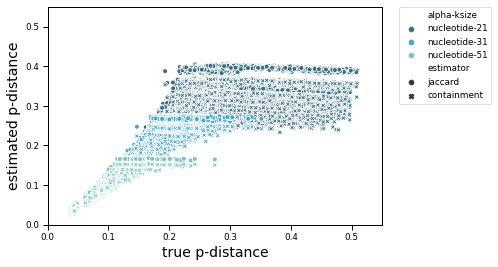

In [82]:
g=sns.scatterplot(data=nucl_only, x="p-distance", y='PC_pdist', hue="alpha-ksize", palette="GnBu_d", style = "estimator")#, )
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("true p-distance", size=14)
plt.ylabel("estimated p-distance", size=14)
g.set(xlim=(0, 0.55), ylim=(0, 0.55))
fig = g.get_figure()
#fig.savefig("estimated p-distance.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

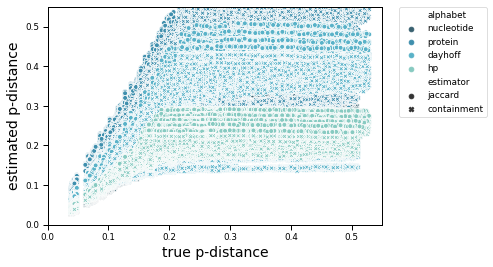

In [83]:
g=sns.scatterplot(data=meltedCompare, x="p-distance", y='estimated p-distance', hue="alphabet", palette="GnBu_d", style = "estimator")
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("true p-distance", size=14)
plt.ylabel("estimated p-distance", size=14)
g.set(xlim=(0, 0.55), ylim=(0, 0.55))

fig = g.get_figure()
#fig.savefig("estimated p-distance.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [84]:
jaccard_only = meltedCompare[meltedCompare["estimator"] == "jaccard"]
nucl_jaccard = jaccard_only[jaccard_only["alphabet"] == "nucleotide"]
contain_only = meltedCompare[meltedCompare["estimator"] == "containment"]
nucl_contain = contain_only[contain_only["alphabet"] == "nucleotide"]




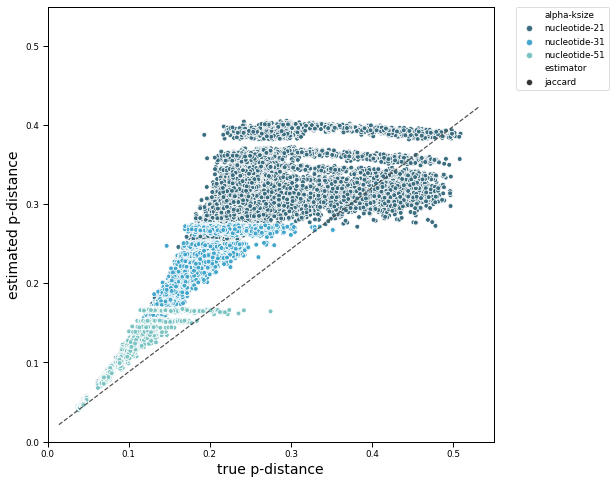

In [92]:
g=sns.scatterplot(data=nucl_jaccard, x="p-distance", y='PC_pdist', hue="alpha-ksize", palette="GnBu_d", style = "estimator")#, )
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#sns.lineplot(data=nucl_jaccard, x="p-distance", y="p-distance")
plt.xlabel("true p-distance", size=14)
plt.ylabel("estimated p-distance", size=14)
g.plot(g.get_xlim(), g.get_ylim(), ls="--", c=".3") #add 1:1 line.
g.set(xlim=(0, 0.55), ylim=(0, 0.55))


fig = g.get_figure()
fig.set_size_inches(8, 8)


### to do?:
put some transpancy or plotting on separate plots next to each other

In [116]:
k21 = meltedCompare.loc[meltedCompare["ksize"] == "21"]
k31 = meltedCompare.loc[meltedCompare["ksize"] == "31"]
k21_jaccard = k21[k21["estimator"] == "jaccard"]
k31_jaccard = k31[k31["estimator"] == "jaccard"]
k21_containment = k21[k21["estimator"] == "containment"]


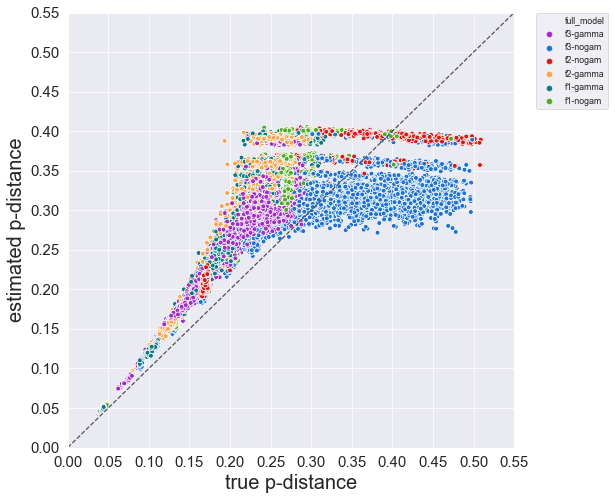

In [159]:

model_colors={"f1-gamma": "#0B7980", "f2-gamma": "#FAA44A", "f3-gamma": "#A22CCB", "f1-nogam": "#4CAD1B", "f2-nogam": "#DF1511", "f3-nogam": "#1B72DA"}

sns.set_style("darkgrid")
sns.set_context("paper")
#sns.set(font_scale = 1.5)
g=sns.scatterplot(data=k21_jaccard, x="p-distance", y='PC_pdist', hue="full_model", palette=model_colors)#"GnBu_d")#, style = "estimator")#, )
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("true p-distance", size=20)
plt.ylabel("estimated p-distance", size=20)
g.set(xlim=(0, 0.55), ylim=(0, 0.55))
g.plot((0, 0.55), (0, 0.55), ls="--", c=".3") 
plt.xticks(np.arange(0, 0.60, 0.05),  size = 15)
plt.yticks(np.arange(0, 0.60, 0.05),  size = 15)

fig = g.get_figure()
fig.set_size_inches(8, 8)
fig.savefig("pdist-nucl21jaccard.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

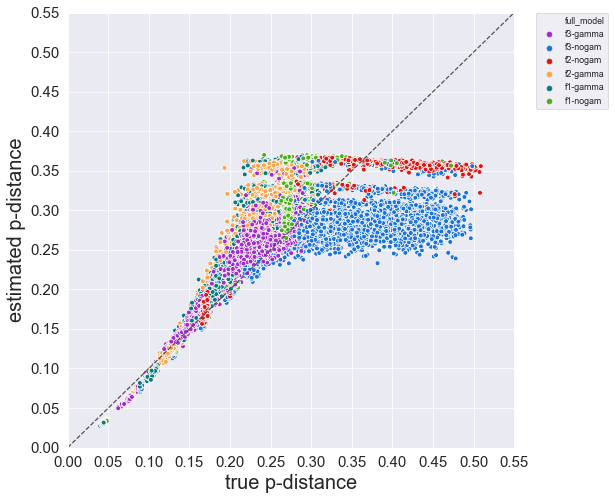

In [249]:
model_colors={"f1-gamma": "#0B7980", "f2-gamma": "#FAA44A", "f3-gamma": "#A22CCB", "f1-nogam": "#4CAD1B", "f2-nogam": "#DF1511", "f3-nogam": "#1B72DA"}
sns.set_style("darkgrid")
sns.set_context("paper")
g=sns.scatterplot(data=k21_containment, x="p-distance", y='PC_pdist', hue="full_model", palette=model_colors)#palette="GnBu_d")#, style = "estimator")#, )
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("true p-distance", size=20)
plt.ylabel("estimated p-distance", size=20)
g.set(xlim=(0, 0.55), ylim=(0, 0.55))
g.plot((0, 0.55), (0, 0.55), ls="--", c=".3") 
plt.xticks(np.arange(0, 0.60, 0.05),  size = 15)
plt.yticks(np.arange(0, 0.60, 0.05),  size = 15)
fig = g.get_figure()
fig.set_size_inches(8, 8)
fig.savefig("pdist-nucl21containment.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

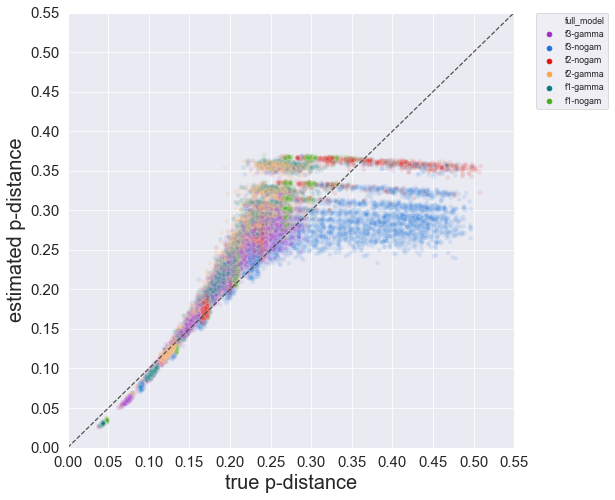

In [178]:
model_colors={"f1-gamma": "#0B7980", "f2-gamma": "#FAA44A", "f3-gamma": "#A22CCB", "f1-nogam": "#4CAD1B", "f2-nogam": "#DF1511", "f3-nogam": "#1B72DA"}
sns.set_style("darkgrid")
sns.set_context("paper")
g=sns.scatterplot(data=k21_containment, x="p-distance", y='PC_pdist', hue="full_model", palette=model_colors, alpha=0.1)#palette="GnBu_d")#, style = "estimator")#, )
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("true p-distance", size=20)
plt.ylabel("estimated p-distance", size=20)
g.set(xlim=(0, 0.55), ylim=(0, 0.55))
g.plot((0, 0.55), (0, 0.55), ls="--", c=".3") 
plt.xticks(np.arange(0, 0.60, 0.05),  size = 15)
plt.yticks(np.arange(0, 0.60, 0.05),  size = 15)
fig = g.get_figure()
fig.set_size_inches(8, 8)
fig.savefig("pdist-nucl21containment.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

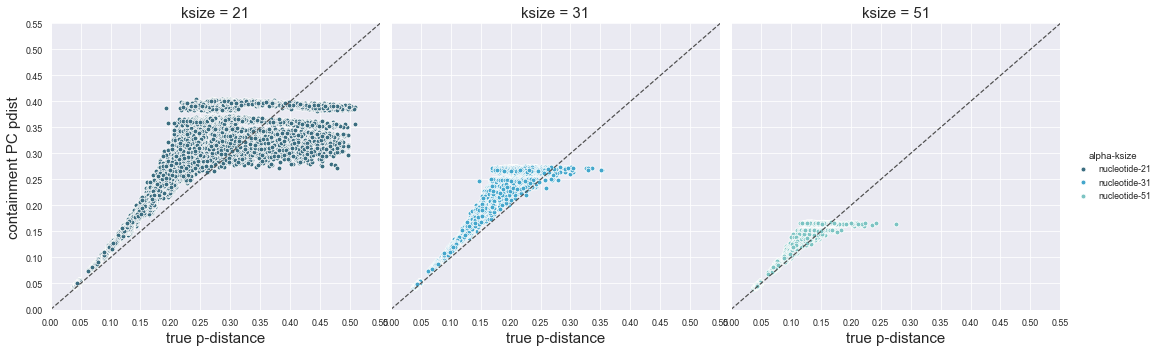

In [223]:
sns.set(font_scale = 1)

with sns.plotting_context("paper", rc={"font.size":10,"axes.titlesize":15,"axes.labelsize":15}):
    g = sns.FacetGrid(data=nucl_jaccard, col="ksize", hue="alpha-ksize",  palette="GnBu_d", height=5)
    g.map(sns.scatterplot, "p-distance", 'PC_pdist')#, style = "estimator")#, hue="alpha-ksize", palette="GnBu_d", style = "estimator"))#, )
    g.add_legend()
    g.set(xlim=(0, 0.55), ylim=(0, 0.55), xticks=np.arange(0, 0.60, 0.05), yticks=np.arange(0, 0.60, 0.05))
    for ax in g.fig.axes:
        ax.plot((0, 0.60), (0, .60), ls="--", c=".3")
    #ax.set_xticks(np.arange(0, 0.60, 0.05)) #,  size = 15)
    #ax.set_yticks(np.arange(0, 0.60, 0.05)) #,  size = 15)
   # ax.set_xlabel("true p-distance", size=14)
   # ax.set_ylabel("containment PC pdist", size=14)
    g.set_axis_labels("true p-distance", "containment PC pdist")
    #plt.setp(g._legend.get_title(), fontsize=20)

#fig = g.get_figure()
#g.set_size_inches(8, 8)
#lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.xlabel("true p-distance", size=14)
#plt.ylabel("estimated p-distance", size=14)
#g.plot(g.get_xlim(), g.get_ylim(), ls="--", c=".3") #add 1:1 line.
#g.set(xlim=(0, 0.55), ylim=(0, 0.55))


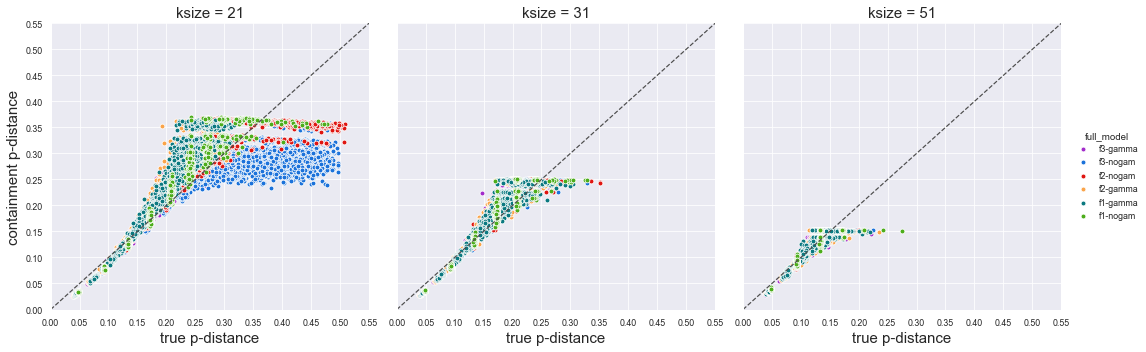

In [250]:
with sns.plotting_context("paper", rc={"font.size":10,"axes.titlesize":15,"axes.labelsize":15}):
    g = sns.FacetGrid(data=nucl_contain, col="ksize", hue="full_model",  palette=model_colors, height=5)
    g.map(sns.scatterplot, "p-distance", 'PC_pdist')#, style = "estimator")#, hue="alpha-ksize", palette="GnBu_d", style = "estimator"))#, )
    g.set(xlim=(0, 0.55), ylim=(0, 0.55), xticks=np.arange(0, 0.60, 0.05), yticks=np.arange(0, 0.60, 0.05))
    for ax in g.fig.axes:
        ax.plot((0, 0.60), (0, .60), ls="--", c=".3")
    g.fig.tight_layout()
    g.add_legend()
    g.set_axis_labels("true p-distance", "containment p-distance")
g.savefig("pdist-nuclcontainment.pdf")

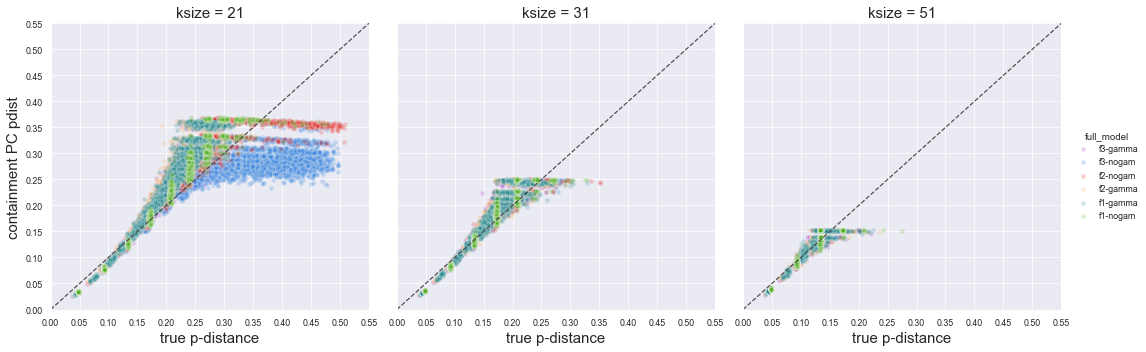

In [251]:
with sns.plotting_context("paper", rc={"font.size":10,"axes.titlesize":15,"axes.labelsize":15}):
    g = sns.FacetGrid(data=nucl_contain, col="ksize", hue="full_model",  palette=model_colors, height=5)
    g.map(sns.scatterplot, "p-distance", 'PC_pdist', alpha=0.2)#, style = "estimator")#, hue="alpha-ksize", palette="GnBu_d", style = "estimator"))#, )
    g.set(xlim=(0, 0.55), ylim=(0, 0.55), xticks=np.arange(0, 0.60, 0.05), yticks=np.arange(0, 0.60, 0.05))
    for ax in g.fig.axes:
        ax.plot((0, 0.60), (0, .60), ls="--", c=".3")
    g.fig.tight_layout()
    g.add_legend()
    g.set_axis_labels("true p-distance", "containment PC pdist")
g.savefig("pdist-nuclcontainment-alpha.pdf")#, bbox_extra_artists=(lgd,), bbox_inches='tight')

[(0.0, 0.55), (0.0, 0.55)]

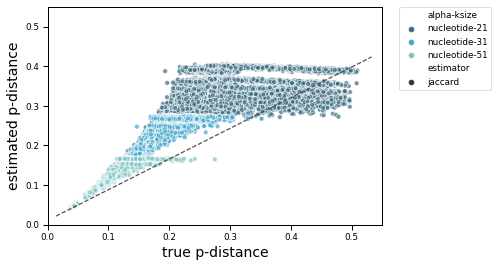

In [22]:
g=sns.scatterplot(data=nucl_jaccard, x="p-distance", y='PC_pdist', hue="alpha-ksize", palette="GnBu_d", style = "estimator",  alpha=.7)#, )
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#sns.lineplot(data=nucl_jaccard, x="p-distance", y="p-distance")
plt.xlabel("true p-distance", size=14)
plt.ylabel("estimated p-distance", size=14)
g.plot(g.get_xlim(), g.get_ylim(), ls="--", c=".3") #add 1:1 line.
g.set(xlim=(0, 0.55), ylim=(0, 0.55))

#fig = g.get_figure()


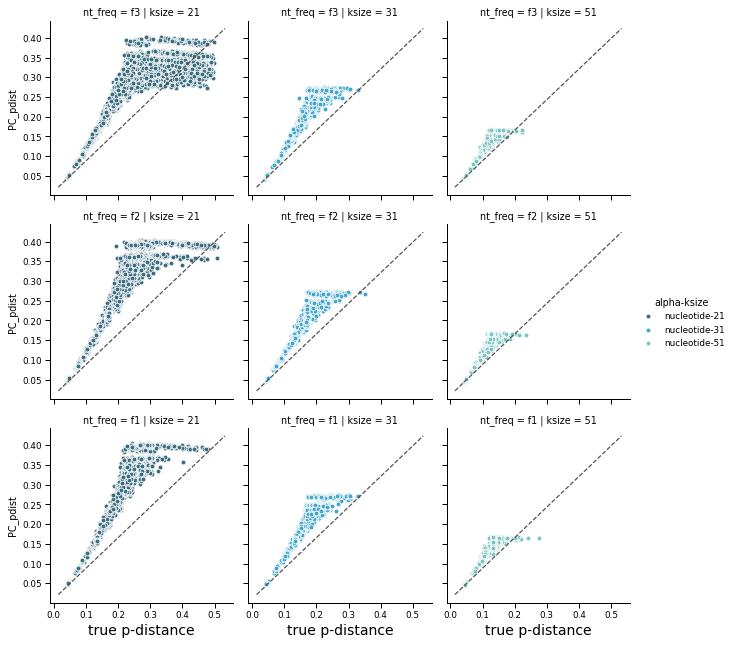

In [67]:
g = sns.FacetGrid(data=nucl_jaccard, col="ksize", row="nt_freq", hue="alpha-ksize",  palette="GnBu_d")
g.map(sns.scatterplot, "p-distance", 'PC_pdist')#, style = "estimator")#, hue="alpha-ksize", palette="GnBu_d", style = "estimator"))#, )
g.add_legend()
xlim=None
for ax in g.fig.axes:
    if not xlim:
        xlim =ax.get_xlim()
        ylim = ax.get_ylim()
    ax.plot(xlim, ylim, ls="--", c=".3")
    ax.set_xlabel("true p-distance", size=14)

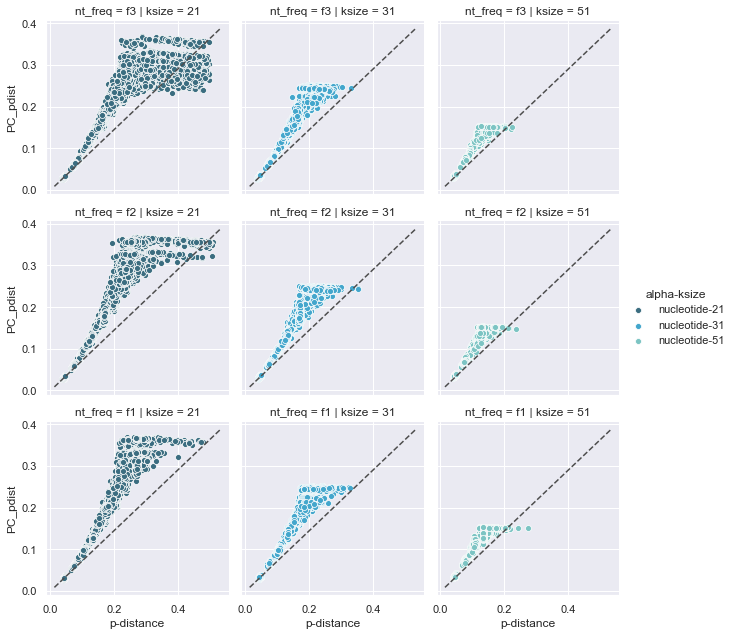

In [246]:
g = sns.FacetGrid(data=nucl_contain, col="ksize", row="nt_freq", hue="alpha-ksize",  palette="GnBu_d")
g.map(sns.scatterplot, "p-distance", 'PC_pdist')#, style = "estimator")#, hue="alpha-ksize", palette="GnBu_d", style = "estimator"))#, )
g.add_legend()
xlim=None
for ax in g.fig.axes:
    if not xlim:
        xlim =ax.get_xlim()
        ylim = ax.get_ylim()
    ax.plot(xlim, ylim, ls="--", c=".3")
    #ax.set_xlabel("true p-distance", size=14)


In [23]:
meltedCompare["true ANI"] = 1- meltedCompare["p-distance"] 
meltedCompare["estimated ANI"] = 1- meltedCompare["PC_pdist"] 

/Users/tessa/miniconda3/envs/forage-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/tessa/miniconda3/envs/forage-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
meltedCompare

name  p-distance  \
0       data-d0.05-f3-gamma-seed401    0.043100   
1       data-d0.05-f3-gamma-seed402    0.037653   
2       data-d0.05-f3-gamma-seed403    0.041617   
3       data-d0.05-f3-gamma-seed404    0.041302   
4       data-d0.05-f3-gamma-seed405    0.043352   
...                             ...         ...   
866395  data-d0.15-f1-gamma-seed196    0.102482   
866396  data-d0.15-f1-gamma-seed197    0.109415   
866397  data-d0.15-f1-gamma-seed198    0.108960   
866398  data-d0.15-f1-gamma-seed199    0.107828   
866399  data-d0.15-f1-gamma-seed200    0.103378   

                                comparison_type  estimated p-distance  \
0       nucleotide-k21-scaled1000.jaccard-pdist              0.049144   
1       nucleotide-k21-scaled1000.jaccard-pdist              0.041895   
2       nucleotide-k21-scaled1000.jaccard-pdist              0.046106   
3       nucleotide-k21-scaled1000.jaccard-pdist              0.047352   
4       nucleotide-k21-scaled1000.jaccard-pdist              0.049552   
...                                         ...                   ...   
866395       hp-k42-scaled100.containment-pdist              0.103938   
866396       hp-k42-scaled100.containment-pdist              0.108930   
866397       hp-k42-scaled100.containment-pdist              0.107592   
866398       hp-k42-scaled100.containment-pdist              0.111599   
866399       hp-k42-scaled100.containment-pdist              0.108651   

          alphabet ksize nt_freq  model    alpha-ksize scaled    estimator  \
0       nucleotide    21      f3  gamma  nucleotide-21   1000      jaccard   
1       nucleotide    21      f3  gamma  nucleotide-21   1000      jaccard   
2       nucleotide    21      f3  gamma  nucleotide-21   1000      jaccard   
3       nucleotide    21      f3  gamma  nucleotide-21   1000      jaccard   
4       nucleotide    21      f3  gamma  nucleotide-21   1000      jaccard   
...            ...   ...     ...    ...            ...    ...          ...   
866395          hp    42      f1  gamma          hp-42    100  containment   
866396          hp    42      f1  gamma          hp-42    100  containment   
866397          hp    42      f1  gamma          hp-42    100  containment   
866398          hp    42      f1  gamma          hp-42    100  containment   
866399          hp    42      f1  gamma          hp-42    100  containment   

        PC_pdist  true ANI  estimated ANI  
0       0.050392  0.956900       0.949608  
1       0.042798  0.962347       0.957202  
2       0.047202  0.958383       0.952798  
3       0.048509  0.958698       0.951491  
4       0.050821  0.956648       0.949179  
...          ...       ...            ...  
866395  0.109746  0.897518       0.890254  
866396  0.115332  0.890585       0.884668  
866397  0.113832  0.891040       0.886168  
866398  0.118332  0.892172       0.881668  
866399  0.115019  0.896622       0.884981  

[679408 rows x 14 columns]

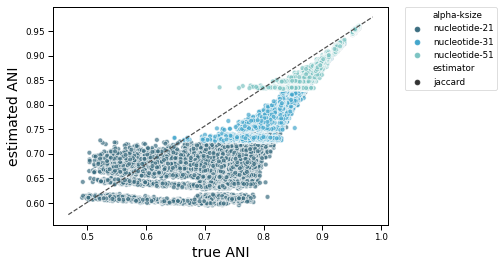

In [25]:
g=sns.scatterplot(data=nucl_jaccard, x="true ANI", y='estimated ANI', hue="alpha-ksize", palette="GnBu_d", style = "estimator",  alpha=.7)#, )
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#sns.lineplot(data=nucl_jaccard, x="p-distance", y="p-distance")
plt.xlabel("true ANI", size=14)
plt.ylabel("estimated ANI", size=14)
g.plot(g.get_xlim(), g.get_ylim(), ls="--", c=".3") #add 1:1 line.
#g.set(xlim=(0, 0.55), ylim=(0, 0.55))

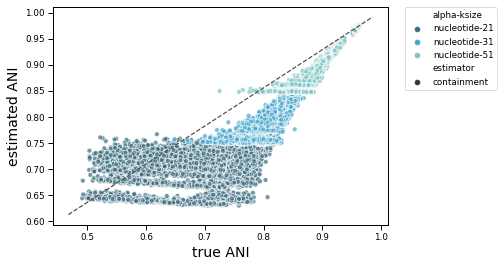

In [26]:
g=sns.scatterplot(data=nucl_contain, x="true ANI", y='estimated ANI', hue="alpha-ksize", palette="GnBu_d", style = "estimator",  alpha=.7)#, )
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("true ANI", size=14)
plt.ylabel("estimated ANI", size=14)
g.plot(g.get_xlim(), g.get_ylim(), ls="--", c=".3") #add 1:1 line.
#g.set(xlim=(0, 0.55), ylim=(0, 0.55))

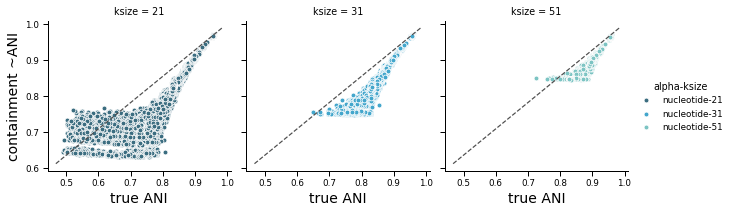

In [52]:
g = sns.FacetGrid(data=nucl_contain, col="ksize", hue="alpha-ksize",  palette="GnBu_d")
g.map(sns.scatterplot, "true ANI", 'estimated ANI')#, style = "estimator")#, hue="alpha-ksize", palette="GnBu_d", style = "estimator"))#, )
xlim=None
for ax in g.fig.axes:
    if not xlim:
        xlim =ax.get_xlim()
        ylim = ax.get_ylim()
    ax.plot(xlim, ylim, ls="--", c=".3")
    ax.set_xlabel("true ANI", size=14)
    ax.set_ylabel("containment ~ANI", size=14)
g.add_legend()

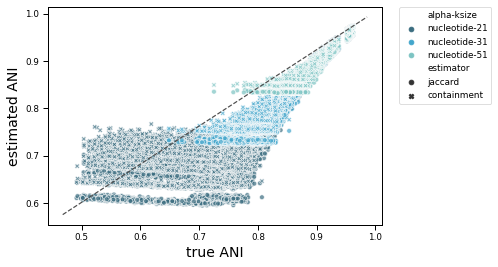

In [28]:
g=sns.scatterplot(data=nucl_only, x="true ANI", y='estimated ANI', hue="alpha-ksize", palette="GnBu_d", style = "estimator",  alpha=.7)#, )
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#sns.lineplot(data=nucl_jaccard, x="p-distance", y="p-distance")
plt.xlabel("true ANI", size=14)
plt.ylabel("estimated ANI", size=14)
g.plot(g.get_xlim(), g.get_ylim(), ls="--", c=".3") #add 1:1 line.
#g.set(xlim=(0, 0.55), ylim=(0, 0.55))

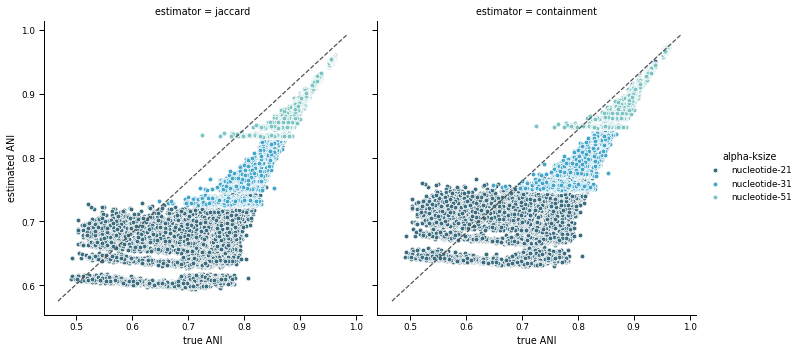

In [51]:
g = sns.FacetGrid(data=nucl_only, col="estimator", hue="alpha-ksize",  palette="GnBu_d", height=5, aspect=1)
g.map(sns.scatterplot, "true ANI", 'estimated ANI')
xlim=None
for ax in g.fig.axes:
    if not xlim:
        xlim =ax.get_xlim()
        ylim = ax.get_ylim()
    ax.plot(xlim, ylim, ls="--", c=".3")

g.add_legend()

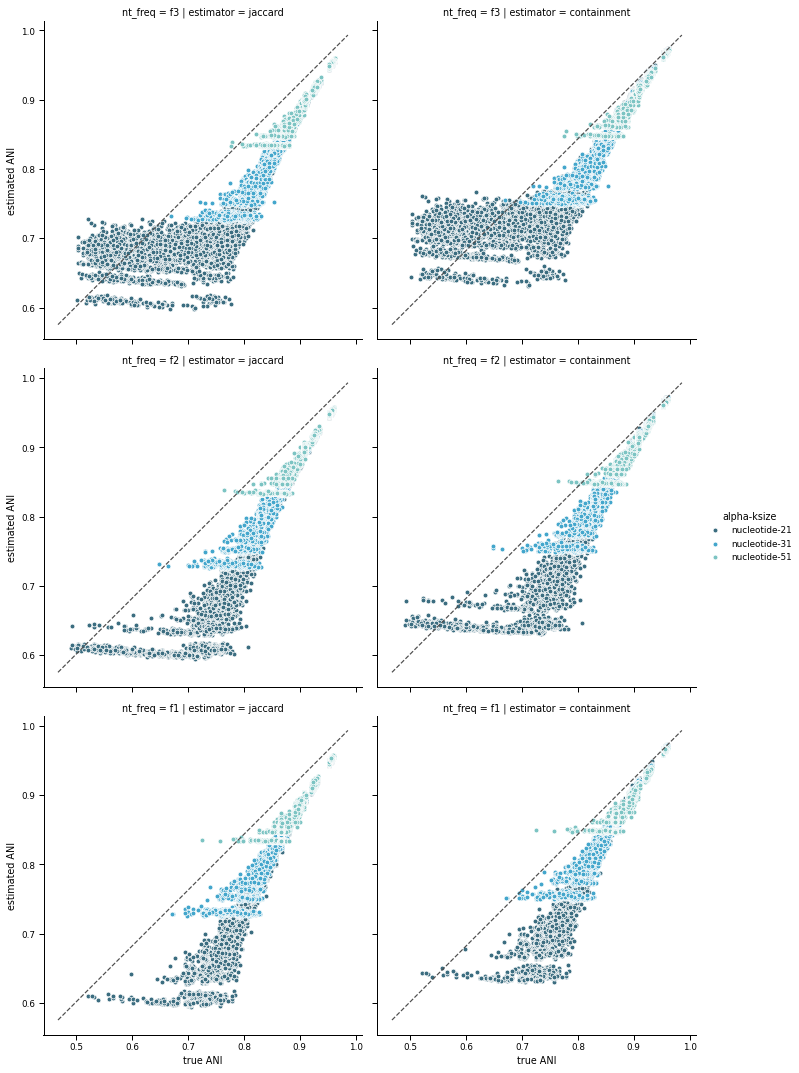

In [50]:
g = sns.FacetGrid(data=nucl_only, col="estimator", row="nt_freq", hue="alpha-ksize",  palette="GnBu_d", height=5, aspect=1)
g.map(sns.scatterplot, "true ANI", 'estimated ANI')
xlim=None
for ax in g.fig.axes:
    if not xlim:
        xlim =ax.get_xlim()
        ylim = ax.get_ylim()
    ax.plot(xlim, ylim, ls="--", c=".3")

g.add_legend()

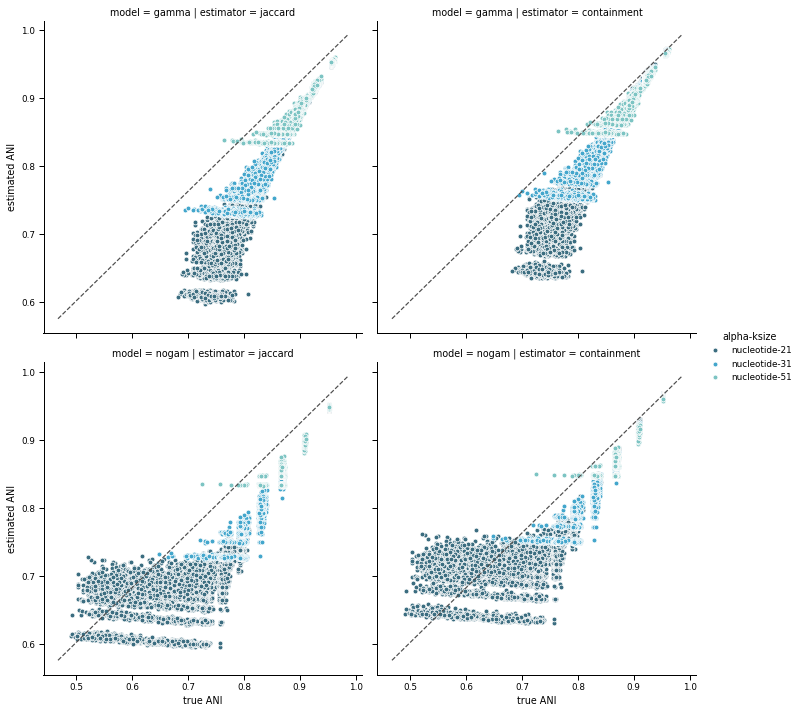

In [49]:
g = sns.FacetGrid(data=nucl_only, col="estimator", row="model", hue="alpha-ksize",  palette="GnBu_d", height=5, aspect=1)
g.map(sns.scatterplot, "true ANI", 'estimated ANI')
xlim=None
for ax in g.fig.axes:
    if not xlim:
        xlim =ax.get_xlim()
        ylim = ax.get_ylim()
    ax.plot(xlim, ylim, ls="--", c=".3")

g.add_legend()

# Prodigal --> Protein Comparisons

In [32]:
proteinDF

seed  freq(T)  freq(C)  freq(A)  freq(G)  rate(C-T)  rate(A-T)  \
0       1     0.25     0.25     0.25     0.25    1.93635   0.262837   
1       2     0.25     0.25     0.25     0.25    2.37147   0.693275   
2       3     0.25     0.25     0.25     0.25    1.58037   0.340743   
3       4     0.25     0.25     0.25     0.25    2.00743   0.615599   
4       5     0.25     0.25     0.25     0.25    1.38297   0.228854   
..    ...      ...      ...      ...      ...        ...        ...   
195   396     0.20     0.30     0.10     0.40    1.72613   0.305606   
196   397     0.20     0.30     0.10     0.40    2.20515   0.183366   
197   398     0.20     0.30     0.10     0.40    2.36705   0.263347   
198   399     0.20     0.30     0.10     0.40    1.73278   0.313713   
199   400     0.20     0.30     0.10     0.40    1.67279   0.275781   

     rate(G-T)  rate(A-C)  rate(C-G)  ...  hp-k39-scaled100.jaccard-pdist  \
0     0.291035   0.586683   0.244816  ...                        1.000000   
1     0.144888   0.496176   0.344651  ...                        1.000000   
2     0.287048   0.508184   0.792160  ...                        1.000000   
3     0.246909   0.598580   0.306629  ...                        1.000000   
4     0.235608   0.332592   0.532473  ...                        1.000000   
..         ...        ...        ...  ...                             ...   
195   0.255530   0.391901   0.286893  ...                        0.178194   
196   0.156466   0.525413   0.277330  ...                        0.186360   
197   0.110166   0.634021   0.269316  ...                        0.168428   
198   0.271502   0.511385   0.653053  ...                        0.185418   
199   0.346833   0.444658   0.449153  ...                        0.175696   

     hp-k39-scaled100.containment  hp-k39-scaled100.containment-pdist  \
0                        0.000000                            1.000000   
1                        0.000000                            1.000000   
2                        0.000000                            1.000000   
3                        0.000000                            1.000000   
4                        0.000000                            1.000000   
..                            ...                                 ...   
195                      0.000482                            0.163120   
196                      0.000339                            0.170641   
197                      0.000761                            0.153270   
198                      0.000341                            0.170504   
199                      0.000561                            0.159849   

     hp-k39-scaled100.num_hashes  hp-k42-scaled100.jaccard  \
0                 (446, 1426, 0)                  0.000000   
1                 (1079, 643, 0)                  0.000000   
2                 (1598, 344, 0)                  0.000000   
3                 (437, 1289, 0)                  0.000000   
4                 (1089, 989, 0)                  0.000000   
..                           ...                       ...   
195              (8570, 8299, 4)                  0.000061   
196              (8852, 9824, 3)                  0.000330   
197              (9199, 9423, 7)                  0.000056   
198              (8795, 9057, 3)                  0.000119   
199              (8909, 9823, 5)                  0.000055   

     hp-k42-scaled100.jaccard-pdist hp-k42-scaled100.containment  \
0                          1.000000                     0.000000   
1                          1.000000                     0.000000   
2                          1.000000                     0.000000   
3                          1.000000                     0.000000   
4                          1.000000                     0.000000   
..                              ...                          ...   
195                        0.192998                     0.000124   
196                        0.160027                     0.000

In [33]:
proteinDF.columns
prot_pdist_columns = [x for x in proteinDF.columns if "pdist" in x]
prot_pdist_columns

['protein-k7-scaled100.jaccard-pdist',
 'protein-k7-scaled100.containment-pdist',
 'protein-k8-scaled100.jaccard-pdist',
 'protein-k8-scaled100.containment-pdist',
 'protein-k9-scaled100.jaccard-pdist',
 'protein-k9-scaled100.containment-pdist',
 'protein-k10-scaled100.jaccard-pdist',
 'protein-k10-scaled100.containment-pdist',
 'protein-k11-scaled100.jaccard-pdist',
 'protein-k11-scaled100.containment-pdist',
 'protein-k12-scaled100.jaccard-pdist',
 'protein-k12-scaled100.containment-pdist',
 'dayhoff-k15-scaled100.jaccard-pdist',
 'dayhoff-k15-scaled100.containment-pdist',
 'dayhoff-k16-scaled100.jaccard-pdist',
 'dayhoff-k16-scaled100.containment-pdist',
 'dayhoff-k17-scaled100.jaccard-pdist',
 'dayhoff-k17-scaled100.containment-pdist',
 'dayhoff-k18-scaled100.jaccard-pdist',
 'dayhoff-k18-scaled100.containment-pdist',
 'dayhoff-k19-scaled100.jaccard-pdist',
 'dayhoff-k19-scaled100.containment-pdist',
 'hp-k33-scaled100.jaccard-pdist',
 'hp-k33-scaled100.containment-pdist',
 'hp-k35

In [268]:
meltedProtein = pd.melt(proteinDF, id_vars=["name", "p-distance"], value_vars=prot_pdist_columns, var_name='comparison_type', value_name='estimated p-distance')

In [269]:
meltedProtein["alphabet"] = meltedProtein["comparison_type"].str.extract(r"(?P<alphabet>\w*)-k")
meltedProtein["ksize"] = meltedProtein["comparison_type"].str.extract(r"-k(?P<ksize>\d*)")
meltedProtein["nt_freq"] = meltedProtein["name"].str.extract(r"-(?P<nt_freq>f\d*)-")
meltedProtein["model"] = meltedProtein["name"].str.extract(r"(?P<model>\w*)-seed")
meltedProtein["alpha-ksize"] = meltedProtein["alphabet"] + "-" + meltedProtein["ksize"]
meltedProtein["scaled"] = meltedProtein["comparison_type"].str.extract(r"-scaled(?P<scaled>\d*)")
meltedProtein["estimator"] = meltedProtein["comparison_type"].str.extract(r".(?P<alphabet>\w*)-pdist")
meltedProtein["full_model"] = meltedProtein["nt_freq"] + "-" + meltedProtein["model"]

In [270]:
meltedProtein = meltedProtein.loc[meltedProtein["estimated p-distance"] < 1.0 ]
meltedProtein["PC_pdist"] = -np.log(1 - meltedProtein["estimated p-distance"])
meltedProtein["true ANI"] = 1- meltedProtein["p-distance"] 
meltedProtein["estimated AAI"] = 1- meltedProtein["PC_pdist"] 

In [271]:
meltedProtein["comparison_type"].unique()

array(['protein-k7-scaled100.jaccard-pdist',
       'protein-k7-scaled100.containment-pdist',
       'protein-k8-scaled100.jaccard-pdist',
       'protein-k8-scaled100.containment-pdist',
       'protein-k9-scaled100.jaccard-pdist',
       'protein-k9-scaled100.containment-pdist',
       'protein-k10-scaled100.jaccard-pdist',
       'protein-k10-scaled100.containment-pdist',
       'protein-k11-scaled100.jaccard-pdist',
       'protein-k11-scaled100.containment-pdist',
       'protein-k12-scaled100.jaccard-pdist',
       'protein-k12-scaled100.containment-pdist',
       'dayhoff-k15-scaled100.jaccard-pdist',
       'dayhoff-k15-scaled100.containment-pdist',
       'dayhoff-k16-scaled100.jaccard-pdist',
       'dayhoff-k16-scaled100.containment-pdist',
       'dayhoff-k17-scaled100.jaccard-pdist',
       'dayhoff-k17-scaled100.containment-pdist',
       'dayhoff-k18-scaled100.jaccard-pdist',
       'dayhoff-k18-scaled100.containment-pdist',
       'dayhoff-k19-scaled100.jaccard-pdist',


In [272]:
meltedProtein

name  p-distance  \
0         data-d0.65-f1-nogam-seed1    0.409146   
1         data-d0.65-f1-nogam-seed2    0.405855   
2         data-d0.65-f1-nogam-seed3    0.421714   
3         data-d0.65-f1-nogam-seed4    0.413461   
4         data-d0.65-f1-nogam-seed5    0.418206   
...                             ...         ...   
729595  data-d0.30-f2-gamma-seed396    0.155534   
729596  data-d0.30-f2-gamma-seed397    0.141927   
729597  data-d0.30-f2-gamma-seed398    0.143800   
729598  data-d0.30-f2-gamma-seed399    0.163066   
729599  data-d0.30-f2-gamma-seed400    0.160464   

                           comparison_type  estimated p-distance alphabet  \
0       protein-k7-scaled100.jaccard-pdist              0.630765  protein   
1       protein-k7-scaled100.jaccard-pdist              0.630875  protein   
2       protein-k7-scaled100.jaccard-pdist              0.629603  protein   
3       protein-k7-scaled100.jaccard-pdist              0.663136  protein   
4       protein-k7-scaled100.jaccard-pdist              0.672723  protein   
...                                    ...                   ...      ...   
729595  hp-k42-scaled100.containment-pdist              0.179359       hp   
729596  hp-k42-scaled100.containment-pdist              0.145019       hp   
729597  hp-k42-scaled100.containment-pdist              0.181135       hp   
729598  hp-k42-scaled100.containment-pdist              0.166479       hp   
729599  hp-k42-scaled100.containment-pdist              0.180374       hp   

       ksize nt_freq  model alpha-ksize scaled    estimator full_model  \
0          7      f1  nogam   protein-7    100      jaccard   f1-nogam   
1          7      f1  nogam   protein-7    100      jaccard   f1-nogam   
2          7      f1  nogam   protein-7    100      jaccard   f1-nogam   
3          7      f1  nogam   protein-7    100      jaccard   f1-nogam   
4          7      f1  nogam   protein-7    100      jaccard   f1-nogam   
...      ...     ...    ...         ...    ...          ...        ...   
729595    42      f2  gamma       hp-42    100  containment   f2-gamma   
729596    42      f2  gamma       hp-42    100  containment   f2-gamma   
729597    42      f2  gamma       hp-42    100  containment   f2-gamma   
729598    42      f2  gamma       hp-42    100  containment   f2-gamma   
729599    42      f2  gamma       hp-42    100  containment   f2-gamma   

        PC_pdist  true ANI  estimated AAI  
0       0.996321  0.590854       0.003679  
1       0.996621  0.594145       0.003379  
2       0.993179  0.578286       0.006821  
3       1.088076  0.586539      -0.088076  
4       1.116947  0.581794      -0.116947  
...          ...       ...            ...  
729595  0.197670  0.844466       0.802330  
729596  0.156676  0.858073       0.843324  
729597  0.199836  0.856200       0.800164  
729598  0.182096  0.836934       0.817904  
729599  0.198907  0.839536       0.801093  

[303768 rows x 15 columns]

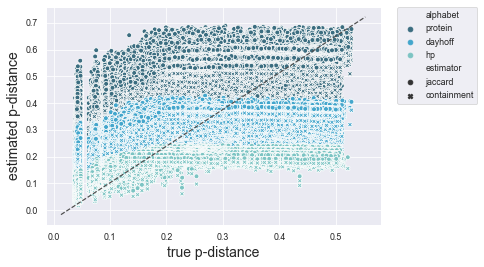

In [273]:
g=sns.scatterplot(data=meltedProtein, x="p-distance", y='estimated p-distance', hue="alphabet", palette="GnBu_d", style = "estimator")
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("true p-distance", size=14)
plt.ylabel("estimated p-distance", size=14)
#g.set(xlim=(0, 0.55), ylim=(0, 0.55))
g.plot(g.get_xlim(), g.get_ylim(), ls="--", c=".3") #add 1:1 line.

fig = g.get_figure()

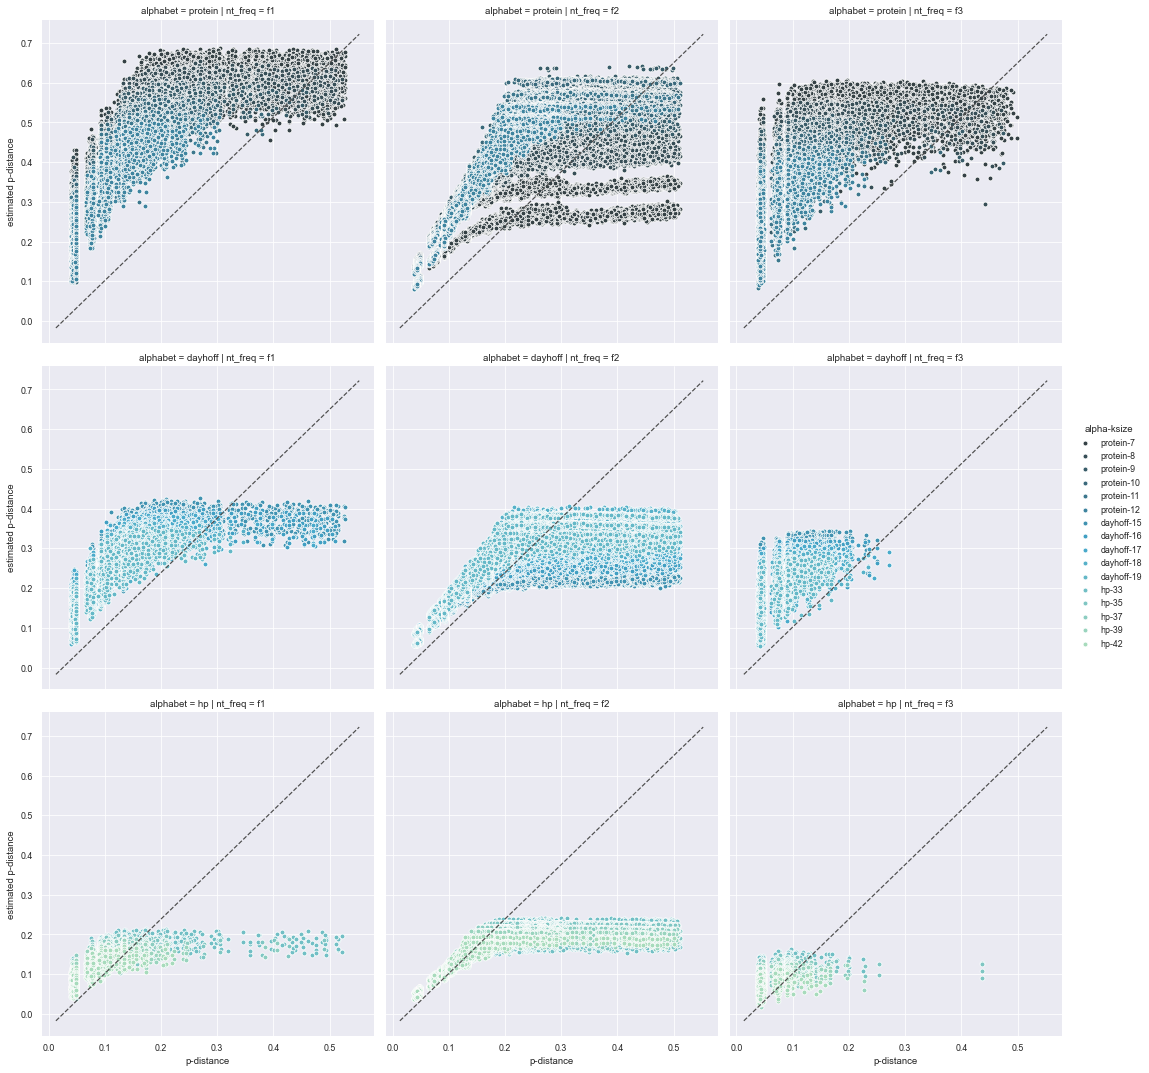

In [274]:
g = sns.FacetGrid(data=meltedProtein, col="nt_freq", row="alphabet", hue="alpha-ksize",  palette="GnBu_d", height=5, aspect=1)
g.map(sns.scatterplot, "p-distance", 'estimated p-distance')
xlim=None
for ax in g.fig.axes:
    if not xlim:
        xlim =ax.get_xlim()
        ylim = ax.get_ylim()
    ax.plot(xlim, ylim, ls="--", c=".3")
# 
g.add_legend()

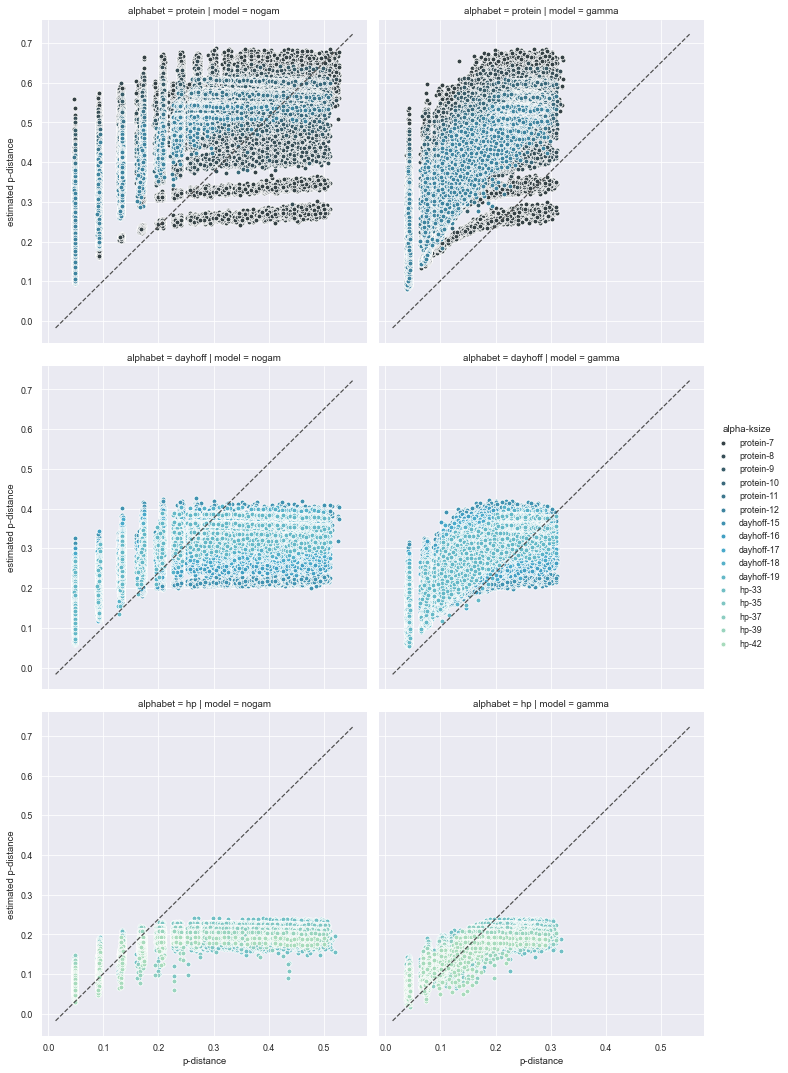

In [275]:
g = sns.FacetGrid(data=meltedProtein, col="model", row="alphabet", hue="alpha-ksize",  palette="GnBu_d", height=5, aspect=1)
g.map(sns.scatterplot, "p-distance", 'estimated p-distance')
xlim=None
for ax in g.fig.axes:
    if not xlim:
        xlim =ax.get_xlim()
        ylim = ax.get_ylim()
    ax.plot(xlim, ylim, ls="--", c=".3")

g.add_legend()

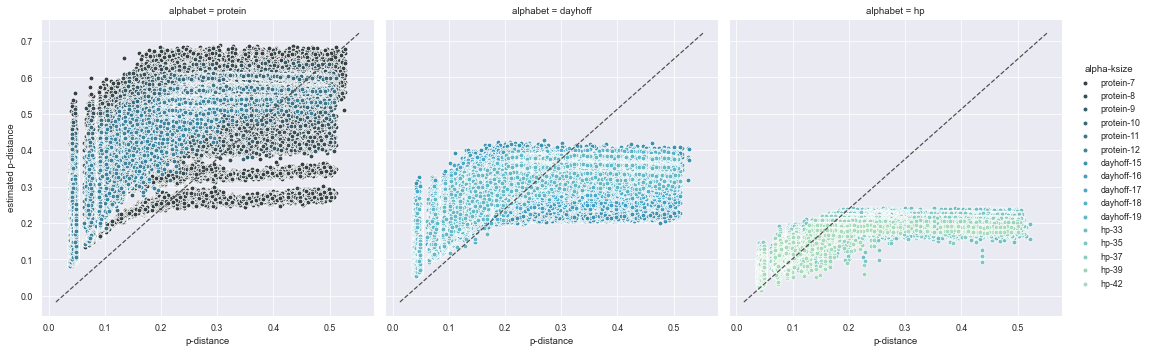

In [276]:
g = sns.FacetGrid(data=meltedProtein, col="alphabet", hue="alpha-ksize",  palette="GnBu_d", height=5, aspect=1)
g.map(sns.scatterplot, "p-distance", 'estimated p-distance')
xlim=None
for ax in g.fig.axes:
    if not xlim:
        xlim =ax.get_xlim()
        ylim = ax.get_ylim()
    ax.plot(xlim, ylim, ls="--", c=".3")

g.add_legend()

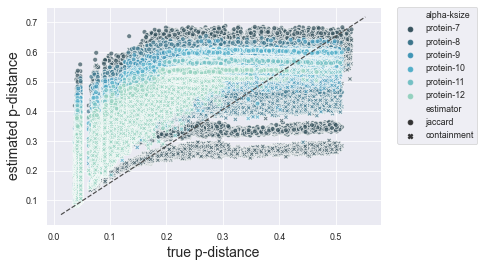

In [277]:
prot_only = meltedProtein[meltedProtein["alphabet"] == "protein"]
g=sns.scatterplot(data=prot_only, x="p-distance", y='estimated p-distance', hue="alpha-ksize", palette="GnBu_d", style = "estimator",  alpha=.7)#, )
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("true p-distance", size=14)
plt.ylabel("estimated p-distance", size=14)
g.plot(g.get_xlim(), g.get_ylim(), ls="--", c=".3") #add 1:1 line.
#g.set(xlim=(0, 0.55), ylim=(0, 0.6))

In [278]:
prot_only

name  p-distance  \
0         data-d0.65-f1-nogam-seed1    0.409146   
1         data-d0.65-f1-nogam-seed2    0.405855   
2         data-d0.65-f1-nogam-seed3    0.421714   
3         data-d0.65-f1-nogam-seed4    0.413461   
4         data-d0.65-f1-nogam-seed5    0.418206   
...                             ...         ...   
273595  data-d0.30-f2-gamma-seed396    0.155534   
273596  data-d0.30-f2-gamma-seed397    0.141927   
273597  data-d0.30-f2-gamma-seed398    0.143800   
273598  data-d0.30-f2-gamma-seed399    0.163066   
273599  data-d0.30-f2-gamma-seed400    0.160464   

                                comparison_type  estimated p-distance  \
0            protein-k7-scaled100.jaccard-pdist              0.630765   
1            protein-k7-scaled100.jaccard-pdist              0.630875   
2            protein-k7-scaled100.jaccard-pdist              0.629603   
3            protein-k7-scaled100.jaccard-pdist              0.663136   
4            protein-k7-scaled100.jaccard-pdist              0.672723   
...                                         ...                   ...   
273595  protein-k12-scaled100.containment-pdist              0.344025   
273596  protein-k12-scaled100.containment-pdist              0.308150   
273597  protein-k12-scaled100.containment-pdist              0.323429   
273598  protein-k12-scaled100.containment-pdist              0.356745   
273599  protein-k12-scaled100.containment-pdist              0.342264   

       alphabet ksize nt_freq  model alpha-ksize scaled    estimator  \
0       protein     7      f1  nogam   protein-7    100      jaccard   
1       protein     7      f1  nogam   protein-7    100      jaccard   
2       protein     7      f1  nogam   protein-7    100      jaccard   
3       protein     7      f1  nogam   protein-7    100      jaccard   
4       protein     7      f1  nogam   protein-7    100      jaccard   
...         ...   ...     ...    ...         ...    ...          ...   
273595  protein    12      f2  gamma  protein-12    100  containment   
273596  protein    12      f2  gamma  protein-12    100  containment   
273597  protein    12      f2  gamma  protein-12    100  containment   
273598  protein    12      f2  gamma  protein-12    100  containment   
273599  protein    12      f2  gamma  protein-12    100  containment   

       full_model  PC_pdist  true ANI  estimated AAI  
0        f1-nogam  0.996321  0.590854       0.003679  
1        f1-nogam  0.996621  0.594145       0.003379  
2        f1-nogam  0.993179  0.578286       0.006821  
3        f1-nogam  1.088076  0.586539      -0.088076  
4        f1-nogam  1.116947  0.581794      -0.116947  
...           ...       ...       ...            ...  
273595   f2-gamma  0.421633  0.844466       0.578367  
273596   f2-gamma  0.368386  0.858073       0.631614  
273597   f2-gamma  0.390717  0.856200       0.609283  
273598   f2-gamma  0.441213  0.836934       0.558787  
273599   f2-gamma  0.418951  0.839536       0.581049  

[133892 rows x 15 columns]

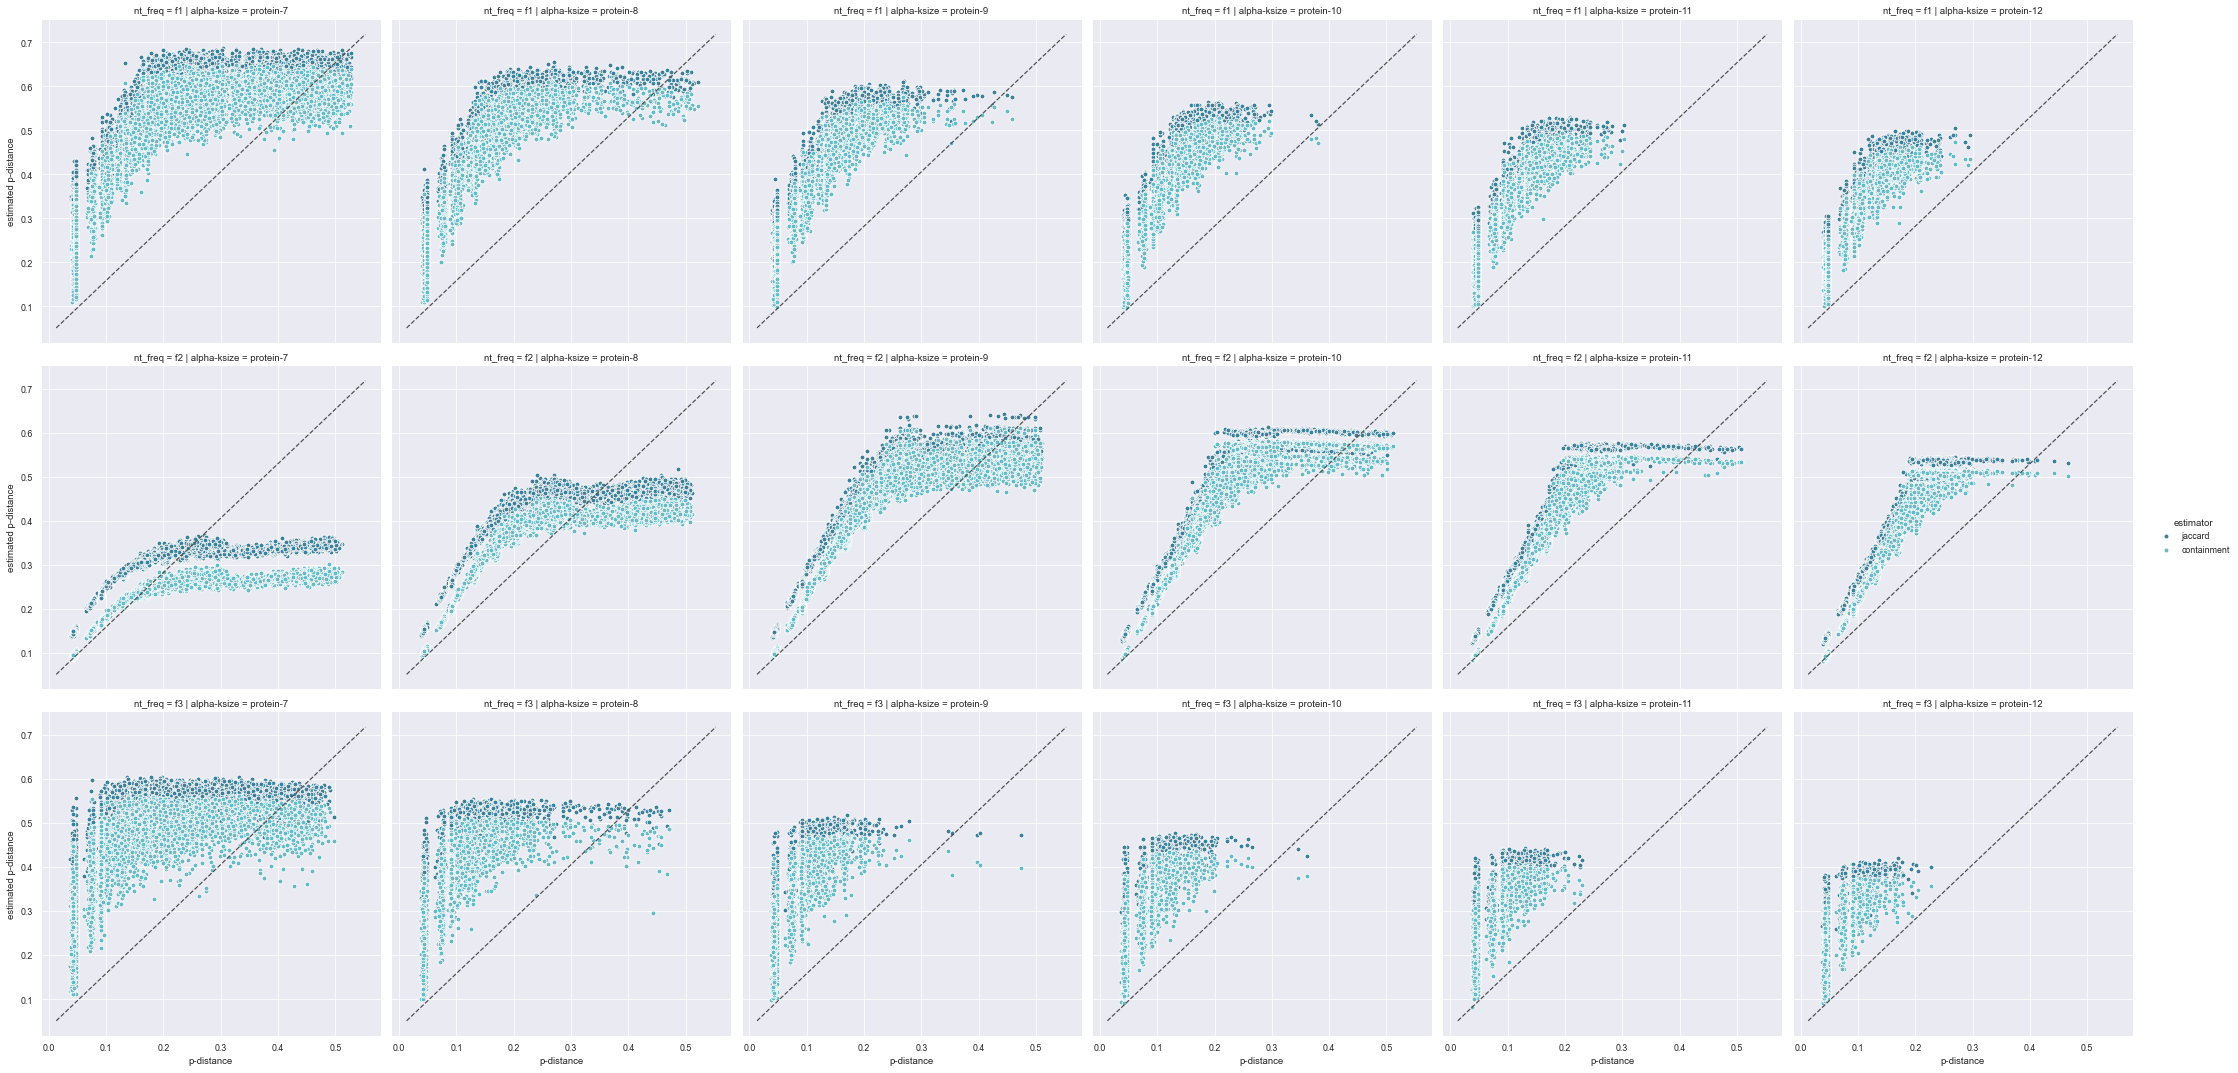

In [279]:
g = sns.FacetGrid(data=prot_only, col="alpha-ksize", row="nt_freq", hue="estimator",  palette="GnBu_d", height=5, aspect=1)
g.map(sns.scatterplot, "p-distance", 'estimated p-distance')
xlim=None
for ax in g.fig.axes:
    if not xlim:
        xlim =ax.get_xlim()
        ylim = ax.get_ylim()
    ax.plot(xlim, ylim, ls="--", c=".3")
g.add_legend()

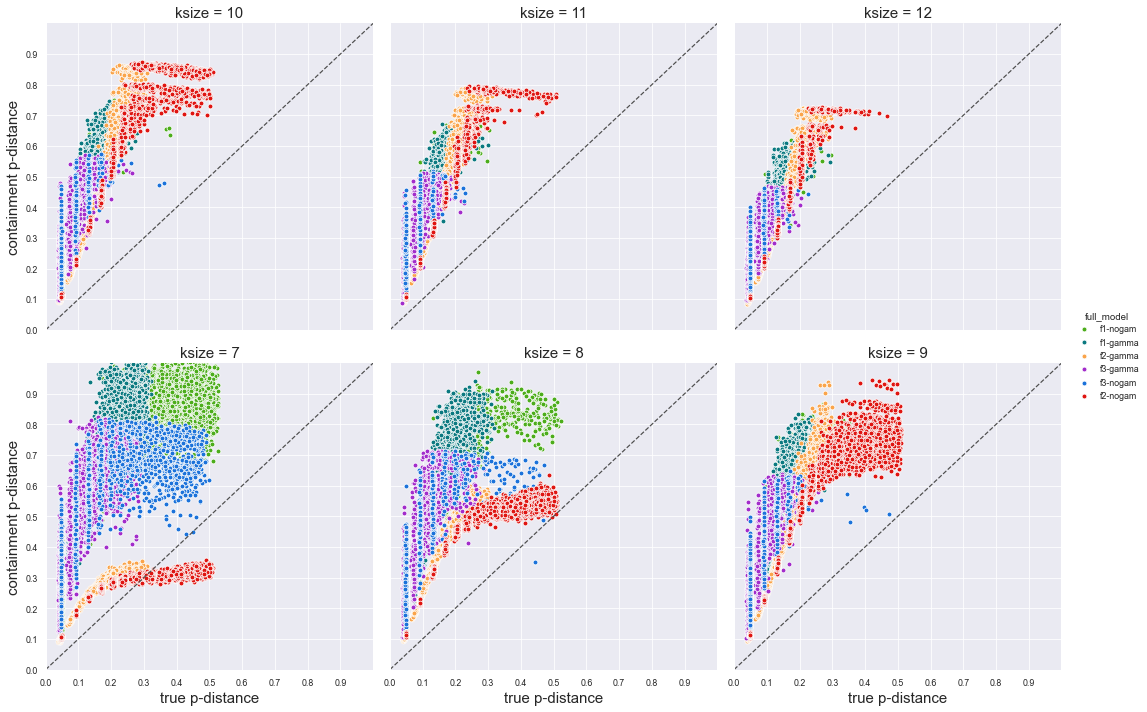

In [298]:
prot_contain = prot_only[prot_only["estimator"] =="containment"]
with sns.plotting_context("paper", rc={"font.size":10,"axes.titlesize":15,"axes.labelsize":15}):
    g = sns.FacetGrid(data=prot_contain, col="ksize", hue="full_model", col_wrap=3, palette=model_colors, height=5)
    g.map(sns.scatterplot, "p-distance", 'PC_pdist')#, style = "estimator")#, hue="alpha-ksize", palette="GnBu_d", style = "estimator"))#, )
    g.set(xlim=(0, 1.0), ylim=(0, 1.0), xticks=np.arange(0, 1.0, 0.1), yticks=np.arange(0, 1.0, 0.1))
    for ax in g.fig.axes:
        ax.plot((0, 1.0), (0, 1.0), ls="--", c=".3")
    g.fig.tight_layout()
    g.add_legend()
    g.set_axis_labels("true p-distance", "containment p-distance")
g.savefig("pdist-protcontainment-ksizes.pdf")

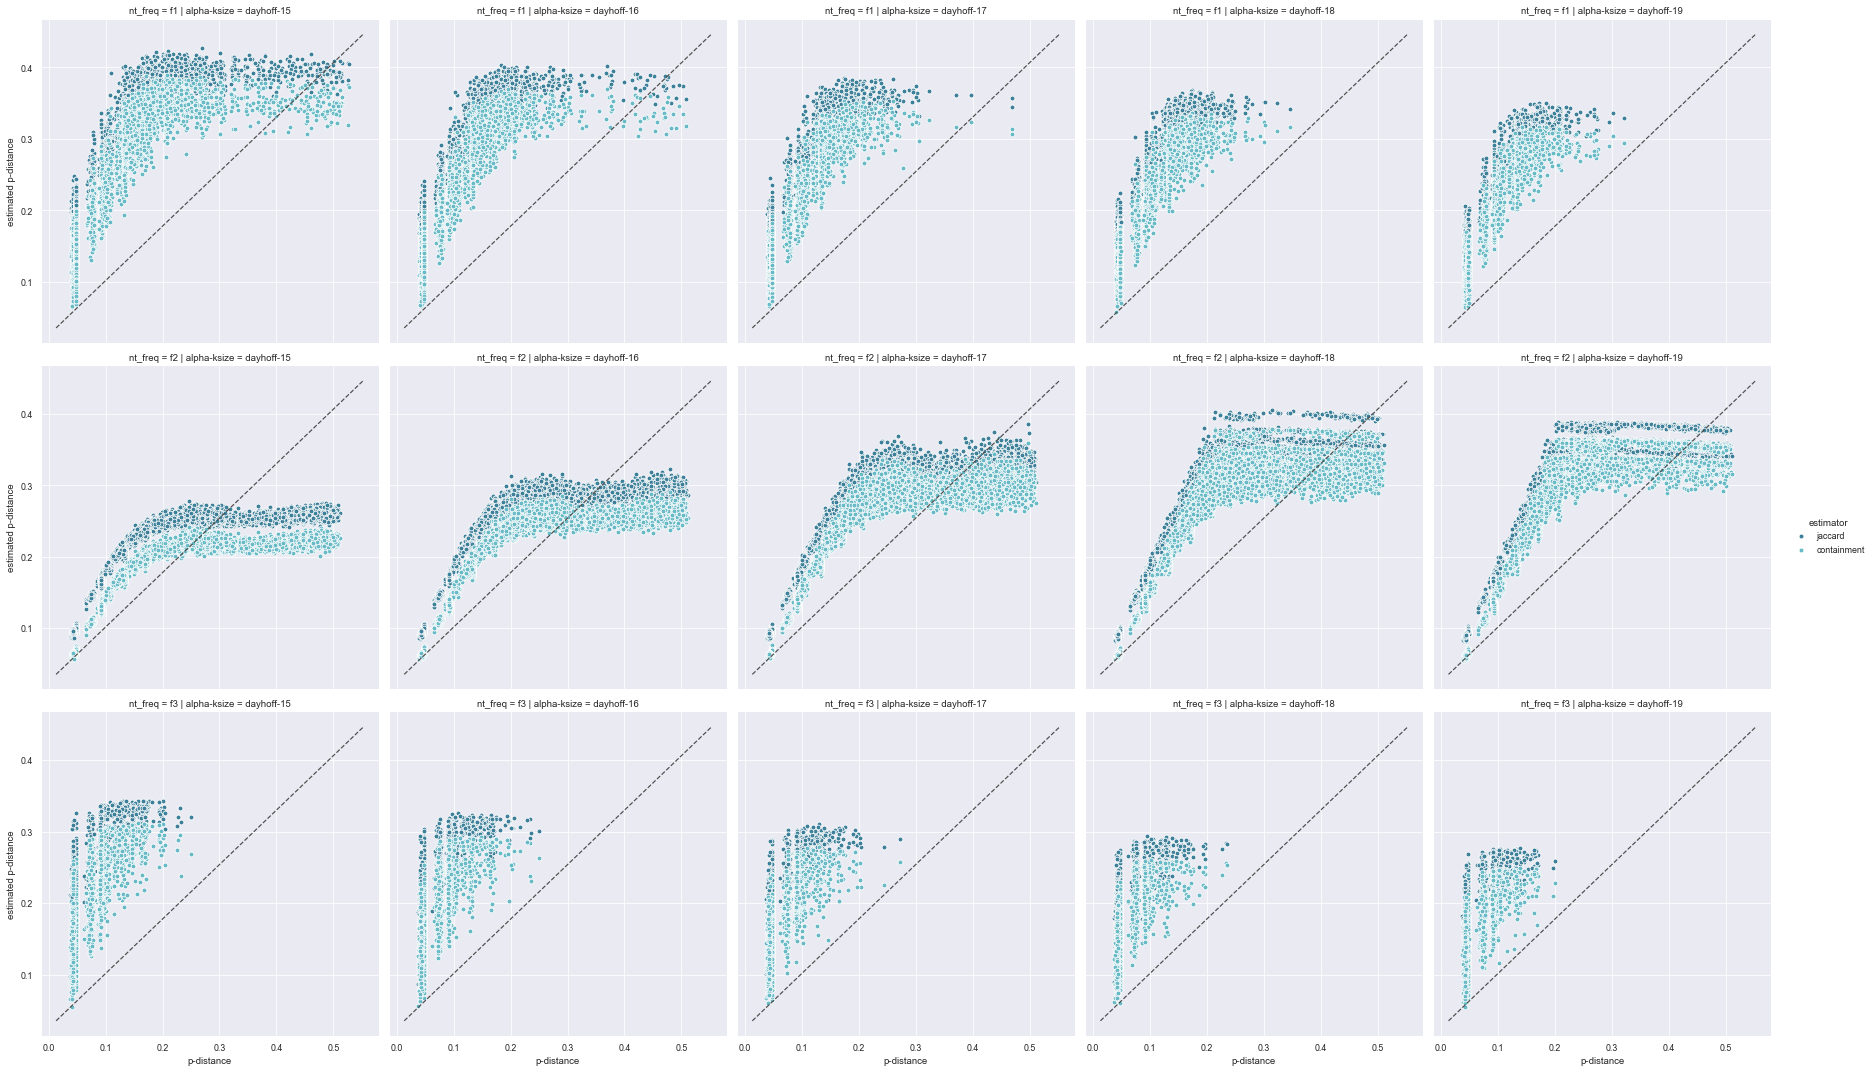

In [281]:
dayhoff_only = meltedProtein[meltedProtein["alphabet"] == "dayhoff"]
g = sns.FacetGrid(data=dayhoff_only, col="alpha-ksize", row="nt_freq", hue="estimator",  palette="GnBu_d", height=5, aspect=1)
g.map(sns.scatterplot, "p-distance", 'estimated p-distance')
xlim=None
for ax in g.fig.axes:
    if not xlim:
        xlim =ax.get_xlim()
        ylim = ax.get_ylim()
    ax.plot(xlim, ylim, ls="--", c=".3")
g.add_legend()

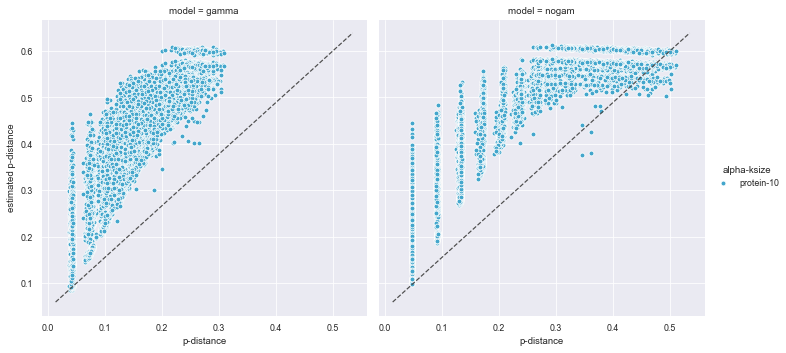

In [292]:
prot10 = meltedProtein[meltedProtein["ksize"] == "10"]
prot11 = meltedProtein[meltedProtein["ksize"] == "11"]

g = sns.FacetGrid(data=prot10, col="model", hue="alpha-ksize",  palette="GnBu_d", height=5, aspect=1)
g.map(sns.scatterplot, "p-distance", 'estimated p-distance')
xlim=None
for ax in g.fig.axes:
    if not xlim:
        xlim =ax.get_xlim()
        ylim = ax.get_ylim()
    ax.plot(xlim, ylim, ls="--", c=".3")


g.add_legend()

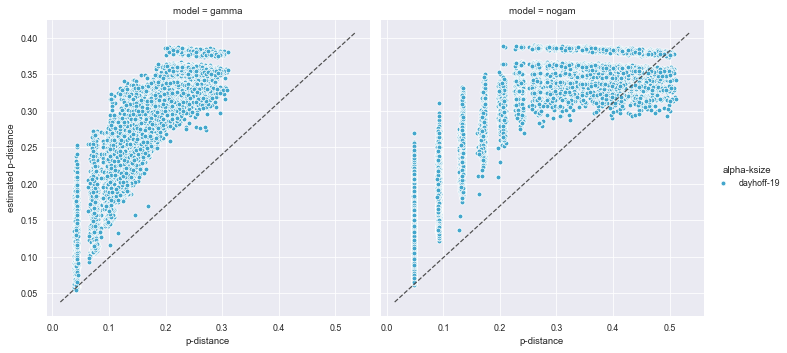

In [283]:
day19 = meltedProtein[meltedProtein["ksize"] == "19"]
g = sns.FacetGrid(data=day19, col="model", hue="alpha-ksize",  palette="GnBu_d", height=5, aspect=1)
g.map(sns.scatterplot, "p-distance", 'estimated p-distance')
xlim=None
for ax in g.fig.axes:
    if not xlim:
        xlim =ax.get_xlim()
        ylim = ax.get_ylim()
    ax.plot(xlim, ylim, ls="--", c=".3")

g.add_legend()

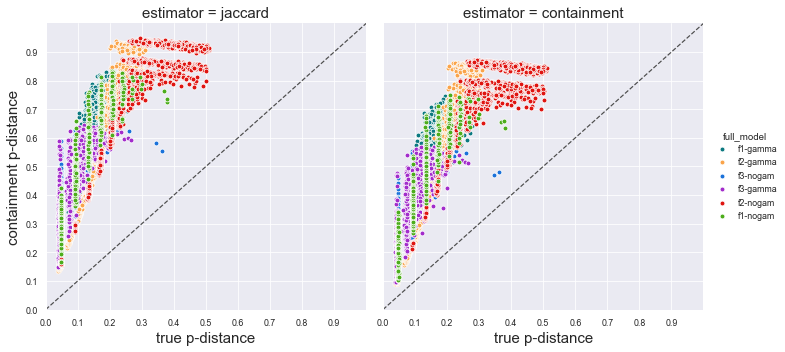

In [296]:
with sns.plotting_context("paper", rc={"font.size":10,"axes.titlesize":15,"axes.labelsize":15}):
    g = sns.FacetGrid(data=prot10, col="estimator", hue="full_model", palette=model_colors, height=5)
    g.map(sns.scatterplot, "p-distance", 'PC_pdist')#, style = "estimator")#, hue="alpha-ksize", palette="GnBu_d", style = "estimator"))#, )
    g.set(xlim=(0, 1.0), ylim=(0, 1.0), xticks=np.arange(0, 1.0, 0.1), yticks=np.arange(0, 1.0, 0.1))
    for ax in g.fig.axes:
        ax.plot((0, 1.0), (0, 1.0), ls="--", c=".3")
    g.fig.tight_layout()
    g.add_legend()
    g.set_axis_labels("true p-distance", "containment p-distance")
g.savefig("pdist-prot10containment.pdf")

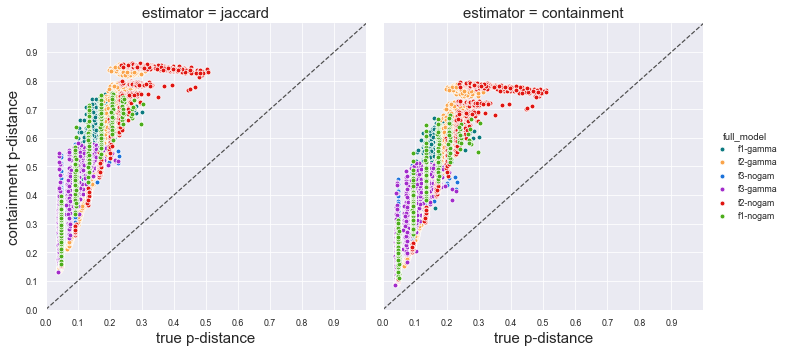

In [297]:
with sns.plotting_context("paper", rc={"font.size":10,"axes.titlesize":15,"axes.labelsize":15}):
    g = sns.FacetGrid(data=prot11, col="estimator", hue="full_model", palette=model_colors, height=5)
    g.map(sns.scatterplot, "p-distance", 'PC_pdist')#, style = "estimator")#, hue="alpha-ksize", palette="GnBu_d", style = "estimator"))#, )
    g.set(xlim=(0, 1.0), ylim=(0, 1.0), xticks=np.arange(0, 1.0, 0.1), yticks=np.arange(0, 1.0, 0.1))
    for ax in g.fig.axes:
        ax.plot((0, 1.0), (0, 1.0), ls="--", c=".3")
    g.fig.tight_layout()
    g.add_legend()
    g.set_axis_labels("true p-distance", "containment p-distance")
g.savefig("pdist-prot11containment.pdf")

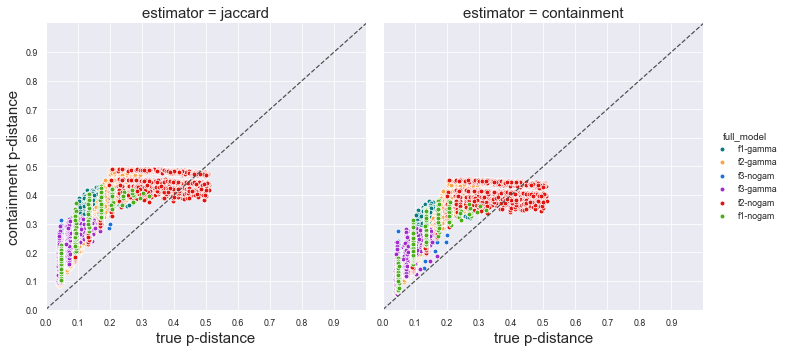

In [299]:
with sns.plotting_context("paper", rc={"font.size":10,"axes.titlesize":15,"axes.labelsize":15}):
    g = sns.FacetGrid(data=day19, col="estimator", hue="full_model", palette=model_colors, height=5)
    g.map(sns.scatterplot, "p-distance", 'PC_pdist')#, style = "estimator")#, hue="alpha-ksize", palette="GnBu_d", style = "estimator"))#, )
    g.set(xlim=(0, 1.0), ylim=(0, 1.0), xticks=np.arange(0, 1.0, 0.1), yticks=np.arange(0, 1.0, 0.1))
    for ax in g.fig.axes:
        ax.plot((0, 1.0), (0, 1.0), ls="--", c=".3")
    g.fig.tight_layout()
    g.add_legend()
    g.set_axis_labels("true p-distance", "containment p-distance")
g.savefig("pdist-dayhoff19containment.pdf")